In [ ]:
import pandas as pd
dataset = pd.read_excel("dataset-uci 2.xls")

In [ ]:
import pandas as pd

dataset = pd.read_excel("dataset-uci 2.xls")

dataset = dataset.drop(columns=['Obesity (%)'])

dataset = dataset.drop(23)

In [ ]:
selected_features = ['Age', 'Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)',
                     'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Weight',
                     'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Body Protein Content (Protein) (%)',
                     'Hepatic Fat Accumulation (HFA)', 'Glucose', 'Total Cholesterol (TC)', 'High Density Lipoprotein (HDL)',
                     'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alkaline Phosphatase (ALP)', 'Creatinine', 'Glomerular Filtration Rate (GFR)',
                     'C-Reactive Protein (CRP)', 'Hemoglobin (HGB)', 'Vitamin D']

X_selected = dataset[selected_features]
y = dataset.iloc[:, 0].values

# 7:3으로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=0, stratify=y)

# 정규화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=1,max_iter=1000)
model.fit(X_train_std, y_train)

y_pred = model.predict(X_test_std)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        48
           1       0.78      0.75      0.77        48

    accuracy                           0.77        96
   macro avg       0.77      0.77      0.77        96
weighted avg       0.77      0.77      0.77        96



In [ ]:
import shap

In [ ]:
predictors = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
explainer = shap.Explainer(model=model, masker=X_test)

In [ ]:
shap_values = explainer(X_test)

Waterfall Plot

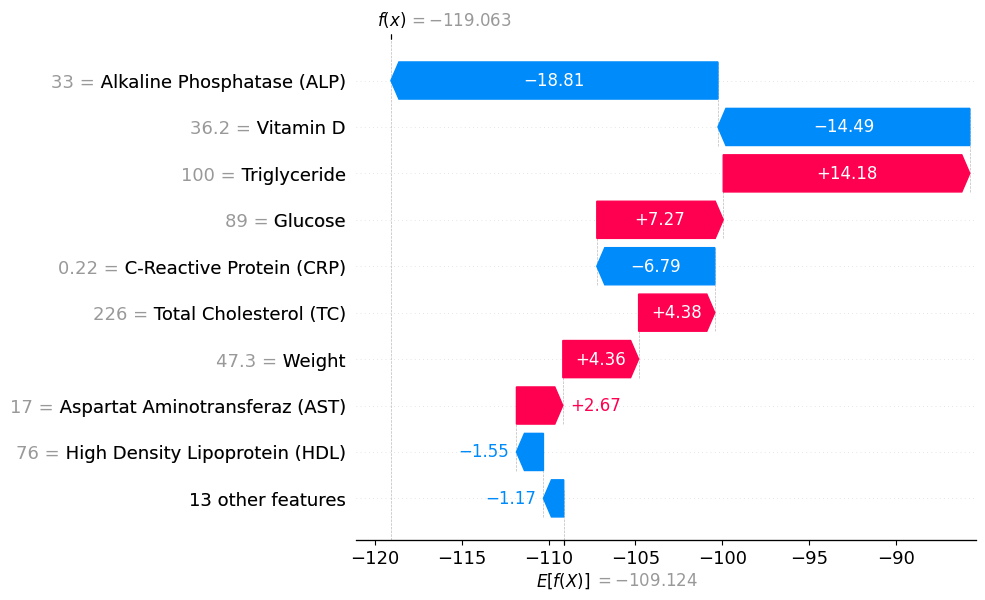

In [ ]:
shap.plots.waterfall(shap_values[0])

Force Plot

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])

Bar Plot

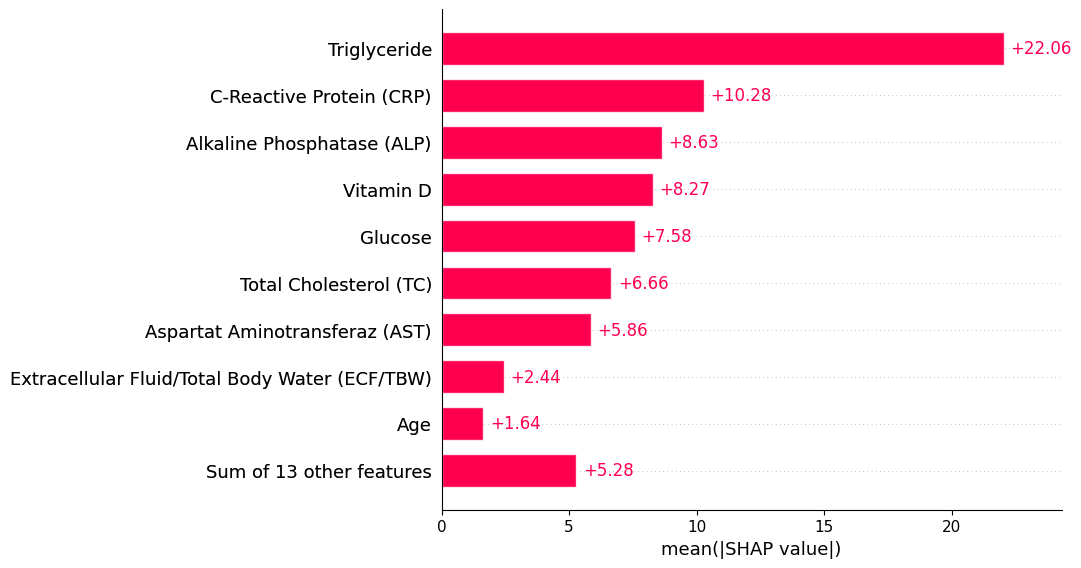

In [ ]:
shap.plots.bar(shap_values)

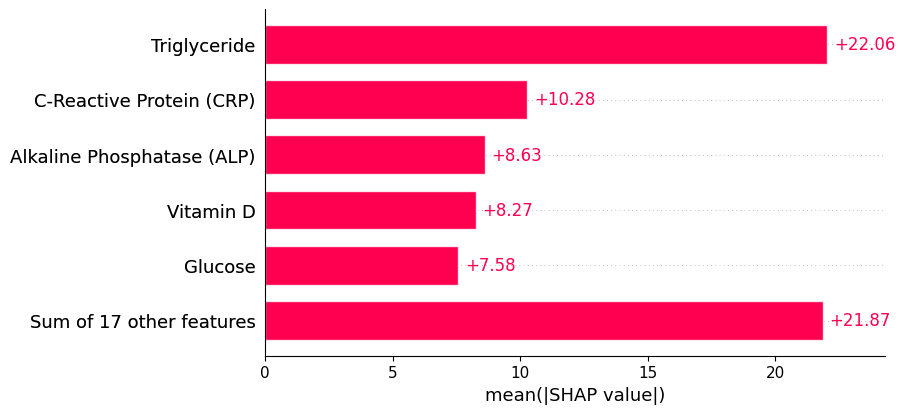

In [ ]:
shap.plots.bar(shap_values, max_display=6)

Beeswarm Plot

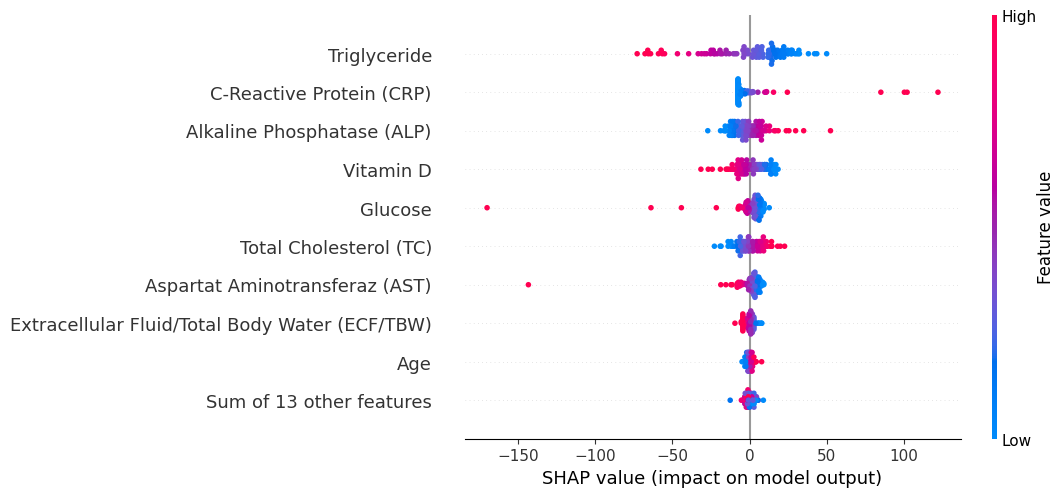

In [ ]:
shap.plots.beeswarm(shap_values)

Force Plot

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0:100])